# Situación
El RMS Titanic fue, en su momento, el mayor barco de pasajeros del mundo.
Se hundió en su viaje inaugural de Southampton a Nueva York, en el año
1912. En el evento, fallecieron 1514 de las 2223 personas que iban a bordo,
entre tripulación y pasajeros.
Hoy, en el año 2022, se ha decidido hacer un estudio de machine learning en
el cual se requiere de nuestras labores como técnicos en Data Science, para
identificar diversos patrones que permitan verificar si, basándonos en el
entrenamiento de nuestro modelo de datos, la máquina es capaz de predecir
si una persona logra sobrevivir o no.
Para ello, se utilizará una base muestral de 1220 datos, que forman parte del
conjunto de datos, que figura en el archivo adjunto “Titanic_M1.xlsx”.
# API 1
## Consignas
Para realizar los futuros modelos de datos, el primer desafío será
preprocesar la base de datos, según las siguientes instrucciones:
### a) Describir brevemente la cantidad de valores faltantes para cada una de las variables de la base de datos.
### b) En la columna Pclass, completar los valores NA, asignando a las personas a la clase 2.
### c) En la clase “Sex”, imputar los datos de manera de poder completar la base solo con los valores “male” y “female”.
### d) En los casos de las personas de las cuales no se tenga la edad, rellenar los datos con el promedio de edad de aquellos que sí tienen el dato.
### e) En la columna embarked, asignar el valor “S” a aquellos datos que se encuentran con valor vacío.


## Carga de datos

Cargar los datos del archivo "titanic_M1.xlsx" en un dataframe.


**Reasoning**:
Se Importa la biblioteca pandas y cargue el archivo Excel en un DataFrame, luego mostramos las primeras filas.



In [10]:
# Instalamos el modulo para que pandas pueda leer archivos .xmsx
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Importamos la libreria pandas
import pandas as pd

# Leemos el archivos y asignamos la variable df
df = pd.read_excel("C:/Users/sergio/Downloads/titanic_M1.xlsx")

# Mostramos en consola las 5 primeras filas
display(df.head())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,2113375.0,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,1515500.0,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,1515500.0,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,1515500.0,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,1515500.0,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## a) Describir brevemente la cantidad de valores faltantes para cada una de las variables de la base de datos.


**Razonamiento**:
Calculamos y se muestra el número de valores faltantes para cada columna en el DataFrame `df`.



In [14]:
# Contamos cuántos valores faltantes (NaN) hay en cada columna
# 'df.isnull()' crea una copia del DataFrame con True donde hay valores faltantes (NaN) y False donde no.
# '.sum()' suma los True por columna (Python los cuenta como 1), así que te dice cuántos valores faltantes hay en cada columna.
missing_values = df.isnull().sum()

# Mostramos la cantidad de valores faltantes por columna
display(missing_values)

pclass         76
survived        0
name            0
sex             0
age           239
sibsp           0
parch           0
ticket          0
fare            0
cabin         927
embarked        2
boat          751
body         1110
home.dest     475
dtype: int64

## b) En la columna Pclass, completar los valores NA, asignando a las personas a la clase 2.



Completamos los valores faltantes en la columna 'pclass' con 2 y luego verificamos que no haya más valores faltantes.


In [ ]:
# Reemplazamos los valores faltantes en la columna 'pclass' con el valor 2 con '.fillna(2)'
df['pclass'] = df['pclass'].fillna(2)

# Mostramos cuántos valores faltantes quedan en 'pclass' (debería ser 0)
# .isnull() marca los NaN como True, y .sum() los cuenta.
display(df['pclass'].isnull().sum())

0

## c) En la clase “Sex”, imputar los datos de manera de poder completar la base solo con los valores “male” y “female”.


Identifique los valores únicos en la columna "sex" para verificar valores distintos a "male" y "female".



In [ ]:
# Obtenemos los valores únicos presentes en la columna 'sex'
# Extrae todos los valores únicos (distintos) que existen en la columna sex del DataFrame df.
unique_sex_values = df['sex'].unique()

# Imprimimos los valores únicos encontrados en 'sex'
print(unique_sex_values)

['female' 'male' 'Hombre' 'Mujer']


Determinar el valor más frecuente entre 'male' y 'female' a utilizar para la imputación y reemplazar los valores inesperados ('Male' y 'Female') con este valor más frecuente.




In [17]:
# Definimos los valores válidos esperados en la columna 'sex'
valid_sex_values = ['male', 'female']

# Filtramos el DataFrame para conservar solo las filas donde 'sex' sea 'male' o 'female'.
# Luego cuenta cuántas veces aparece cada uno (value_counts()).
sex_counts = df[df['sex'].isin(valid_sex_values)]['sex'].value_counts()

# Identificamos cuál es el valor más frecuente ('male' o 'female')
most_frequent_sex = sex_counts.idxmax()

# Reemplazamos en la columna 'sex' cualquier valor que sea 'Hombre' o 'Mujer' por el valor más frecuente (most_frequent_sex).
# Esto ayuda si hay mezclas de idiomas o formatos en los datos.
df['sex'] = df['sex'].replace(['Hombre', 'Mujer'], most_frequent_sex)

# Verificamos los valores únicos en 'sex' después de la limpieza
unique_sex_values_after_imputation = df['sex'].unique()
print(unique_sex_values_after_imputation)

['female' 'male']


## d) En los casos de las personas de las cuales no se tenga la edad, rellenar los datos con el promedio de edad de aquellos que sí tienen el dato.


Calculamos la media de la columna 'edad' y completa los valores faltantes con la media calculada.



In [19]:
# Calculamos la media de la columna 'age', ignorando los valores faltantes automaticamente
# Guarda ese número en la variable mean_age
mean_age = df['age'].mean()

# Reemplazamos los valores faltantes en 'age' con la media
df['age'] = df['age'].fillna(mean_age)

# Verificamos que ya no queden valores faltantes en 'age'
print(df['age'].isnull().sum())

0


## e) En la columna embarked, asignar el valor “S” a aquellos datos que se encuentran con valor vacío.


Identificamos las filas en la columna 'embarked' que tienen valores faltantes y rellénelas con 'S', luego verifique que no haya más valores faltantes en la columna 'embarked'.


In [ ]:
# Imprimimos en consola los valores faltantes de la columna embarked
print("Valores faltantes en 'embarked' antes de la imputación:")
display(df['embarked'].isnull().sum())

# Rellenamos la columna 'embarked' con la letra 'S'
# Imputamos los valores faltantes de 'embarked' con 'S', el puerto más frecuente (Southampton)
df['embarked'] = df['embarked'].fillna('S')

# Imprimimos devuelta en consola la columna embarked para saber si quedan valores faltantes
print("\nValores faltantes en 'embarked' después de la imputación:")
display(df['embarked'].isnull().sum())

Valores faltantes en 'embarked' antes de la imputación:


2


Valores faltantes en 'embarked' después de la imputación:


0

# API 2

## Consignas
El desafío actual consiste en generar un modelo de regresión logística que
permita calcular el grado de accuracy con el cual se pueda determinar, en el
grupo de "prueba", quiénes son los sobrevivientes en la tragedia del Titanic.
### a) Describir brevemente la cantidad de valores faltantes para cada una de las variables de la base de datos.
### b) Completar aquellas variables que se encuentran faltantes para las bases de train (“Age”,”fare”, “Cabin”) y test ( “Age”, “Cabin”, “embarked”).
### c) Ajustar el primer modelo de regresión logística.
### d) Entrenar y determinar el nivel de accuracy del primer modelo.

Para ello se utilizarán varias bases para llevar a cabo nuestro análisis: las
primeras denominadas “train.csv” y “test.csv”, que pertenecen a un set de
datos de entrenamiento; y otra para testear nuestra información.

In [21]:
# Paso 1 cargamos los datasets "train.csv" y "test.csv"
train = pd.read_csv("C:/Users/sergio/Downloads/Archivos_Titanic/train.csv")
test = pd.read_csv("C:/Users/sergio/Downloads/Archivos_Titanic/test.csv")

## a) Describir brevemente la cantidad de valores faltantes para cada una de las variables de la base de datos

In [31]:
# Agregamos columnas a cada dataset para que identifique el origen de cada fila
train['source'] = 'train'
test['source'] = 'test'

# Unimos ambos datasets
# Se conserva el índice original de cada fila con 'ignore_index=True'
df = pd.concat([train, test], ignore_index=True)

# Contamos los valores faltantes con por columna
missing_values = df.isnull().sum()

# Mostramos las columnas que tienen al menos un valor faltante
missing_values = missing_values[missing_values>0]

# Mostramos el resultado ordenados de mayor a menor
missing_values = missing_values.sort_values(ascending=False)

# Mostramos el resultado completo
print("Los valores faltantes por columna (train + test combinados)")
display(missing_values)


Los valores faltantes por columna (train + test combinados)


Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

C:\Users\sergio\AppData\Local\Temp\ipykernel_15240\585369760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

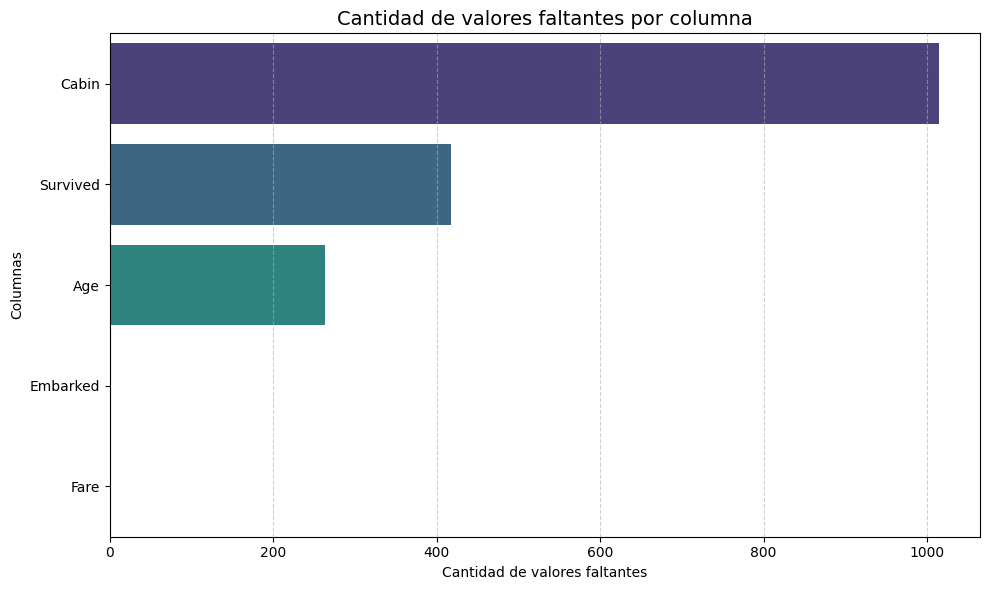

In [36]:
# Graficamos los datos faltantes en un 'barplot' para una mejor visualización
# Importamos las librerias necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos el grafico 
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')

plt.title('Cantidad de valores faltantes por columna', fontsize=14)
plt.xlabel('Cantidad de valores faltantes')
plt.ylabel('Columnas')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show

### b) Completar aquellas variables que se encuentran faltantes para las bases de train (“Age”,”fare”, “Cabin”) y test ( “Age”, “Cabin”, “embarked”).

### Imputamos la Columna 'Age'

In [ ]:
# Primero, veamos cuántos valores faltantes hay en la columna 'Age' y qué promedio/mediana tiene la columna:
print("Valores faltantes en la columna 'Age': ", df['Age'].isnull().sum())
print("Media de 'Age':", df['Age'].mean())
print("Mediana de 'Age': ",df['Age'].median())

Valores faltantes en la columna 'Age':  263
Media de 'Age': 29.881137667304014
Mediana de 'Age':  28.0


In [ ]:
# Imputamos los valores faltantes de 'Age' con la mediana (más robusta ante outliers)

# Calculamos la mediana de 'Age'
mediana_age = df['Age'].median()

# Reemplazamos los NaN con la mediana
df['Age'] = df['Age'].fillna(mediana_age)

# Verificamos que ya no haya valores faltantes en la columna 'Age'
print("Valores faltantes en 'Age' despues de imputar: ", df['Age'].isnull().sum())

Valores faltantes en 'Age' despues de imputar:  0


### Imputamos la Columna 'Fare'

In [46]:
# Ahora vamos a ver cuantos valores faltantes hay en la columna 'Fare'
print("Valores faltantes en la columna 'Fare': ", df['Fare'].isnull().sum())
print("Mediana de 'Fare': ", df['Fare'].median())

Valores faltantes en la columna 'Fare':  1
Mediana de 'Fare':  14.4542


In [49]:
# Calculamos la mediana de 'Fare'
mediana_fare = df['Fare'].median()

# Reemplazamos los NaN con la mediana
df['Fare'] = df['Fare'].fillna(mediana_fare)

# Verificamos que ya no haya valores faltantes en 'Fare'
print("Valores faltantes en la columna 'Fare': ", df['Fare'].isnull().sum())

Valores faltantes en la columna 'Fare':  0


### Imputamos la columna 'Embarked'

In [51]:
# Primero revisamos los valores
print("Valores faltantes de 'Embarked'; ",df['Embarked'].isnull().sum())
print("Valores únicos de 'Embarked':")
print(df['Embarked'].value_counts(dropna=False))

Valores faltantes de 'Embarked';  2
Valores únicos de 'Embarked':
Embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64


In [55]:
# Imputamos con la Moda

# Obtenemos la categoria mas frecuente (moda)
moda_embarked = df['Embarked'].mode()[0]

# Reemplazamos los NaN con la moda
df['Embarked'] = df['Embarked'].fillna(moda_embarked)

# Verificamos que ya no haya valores faltantes
print("Valores faltantes en 'Embarked' despues de imputar: ", df['Embarked'].isnull().sum())

Valores faltantes en 'Embarked' despues de imputar:  0


### Imputamos la columna 'Cabin'
Contexto:
Cabin indica el número de cabina del pasajero, pero es una variable categórica de texto (como 'C123', 'E45', etc.).

Tiene muchísimos valores faltantes (más del 75% en total).

Imputarla directamente con una cabina común no tiene mucho sentido porque es muy dispersa.

### ¿Qué estrategia usamos?
### Como es una columna con mucha ausencia de datos, lo más común es:
Crear una nueva columna llamada Tiene_Cabina (binaria):

1 si el pasajero tiene valor en Cabin

0 si el valor es nulo

Esto transforma la información en algo útil para un modelo, sin necesidad de adivinar cabinas.

In [58]:
# Paso 1 creamos la columna binaria: 1 si tiene cabina, 0 si no tiene
df['Tiene_Cabina'] = df['Cabin'].notnull().astype(int)

# Verificamos la cantidad
print(df['Tiene_Cabina'].value_counts())

Tiene_Cabina
0    1014
1     295
Name: count, dtype: int64


## c) Ajustar el primer modelo de regresión logística.
### ¿Qué vamos a hacer en esta etapa?
Separar nuevamente train y test usando la columna source.

Seleccionar las variables (features) y la variable objetivo (Survived).

Convertir variables categóricas a numéricas (como 'Sex', 'Embarked').

Entrenar un modelo de regresión logística con los datos de entrenamiento.

In [59]:
# Paso 1 separar los datasets

# Recuperamos los datasets originales ya imputados
df_train = df[df['source'] == 'train'].copy()
df_test = df[df['source'] == 'test'].copy()

In [60]:
# Paso 2 preparamos las variables

# Variable objetivo
target =  'Survived'

# Variables predictorias
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Tiene_Cabina']

In [61]:
# Paso 3 codificamos las variables categóricas

# Usamos pd.get_dummies() para convertir las variables Sex y Embarked en columnas numéricas
# Codificamos variables categóricas usando one-hot encodign (sin drop_first para no perder info)
X_train = pd.get_dummies(df_train[features], drop_first=True)
y_train = df_train[target]

In [64]:
# Paso 4 ahora entrenamos el modelo
# Importamos modelos de sklearn
from sklearn.linear_model import LogisticRegression

# Creamos el modelo de regresión logística
modelo_logistico = LogisticRegression(max_iter=1000)

# Entrenamos el modelo con los datos de entrenamiento
modelo_logistico.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## d) Entrenar y determinar el nivel de accuracy del primer modelo.
### Como ya entrenamos el modelo en la consigna c), ahora solo queda evaluar su rendimiento.

In [67]:
# Primero importamos el modelo para determinar el 'accuracy'
from sklearn.metrics import accuracy_score

# Hacemos las predicciones sobre los datos de entrenaminto
y_pred = modelo_logistico.predict(X_train)

# Calculamos el 'accuracy'
accuracy = accuracy_score(y_train, y_pred)

# Mostramos el resultado 
print(f"Accuracy del modelo sobre los datos de entrenamiento: {accuracy:.4f}")

Accuracy del modelo sobre los datos de entrenamiento: 0.7969
